In [10]:
import pandas as pd
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
import pandas as pd
file_path = 'parks.csv'
parks = pd.read_csv(file_path)



In [12]:
parks["neighborhood"].value_counts()

East Liberty                 12
Central Business District    10
Beechview                     8
South Side Slopes             7
Point Breeze                  7
                             ..
Hays                          1
Arlington                     1
Stanton Heights               1
Morningside                   1
Squirrel Hill North           1
Name: neighborhood, Length: 73, dtype: int64

In [13]:
parks = parks[parks["type"]=="Park"]

Text(0.5, 0, 'Neighborhood')

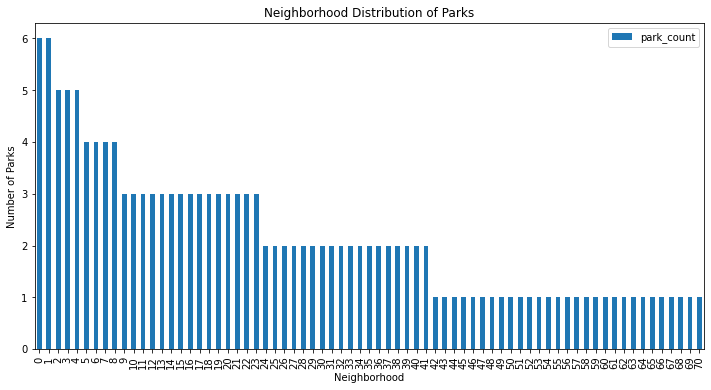

In [14]:
num_parks = parks["neighborhood"].value_counts().reset_index()
num_parks.columns = ["neighborhood", "park_count"]
num_parks.plot.bar(figsize=(12,6))
plt.title("Neighborhood Distribution of Parks")
plt.ylabel("Number of Parks")
plt.xlabel("Neighborhood")

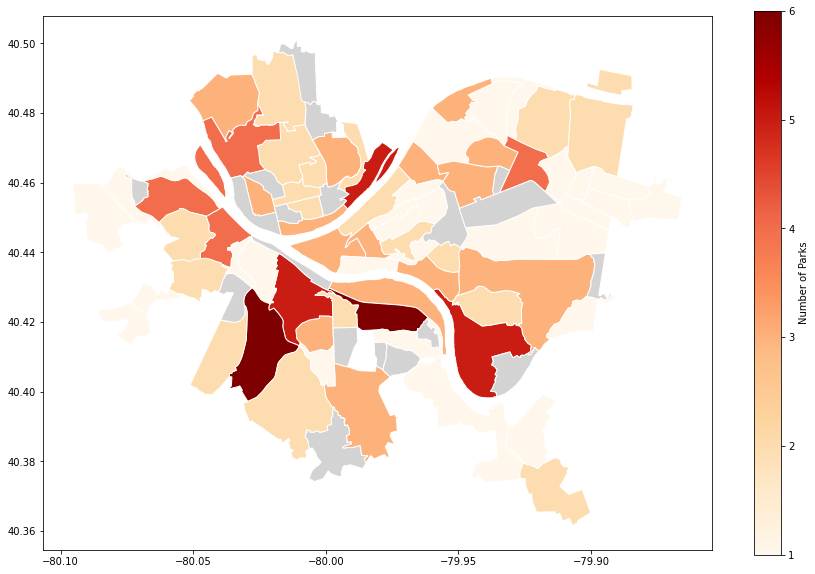

In [15]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
park_map = neighborhoods.merge(num_parks, how="left", left_on="hood", right_on="neighborhood")
park_map.plot(column='park_count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Parks"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

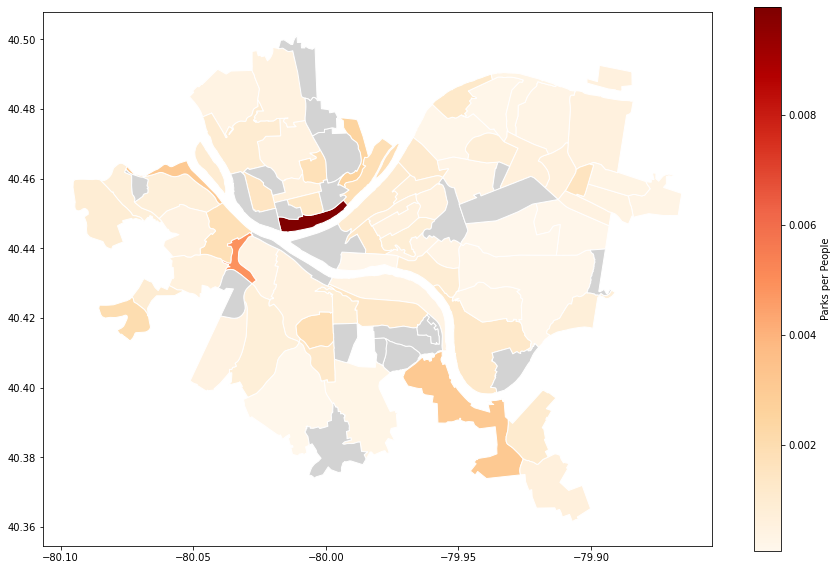

In [16]:
populations = pd.read_csv("populations.csv")

merged_data = park_map.merge(populations, how="left", left_on="hood", right_on="Neighborhood")

# Calculate people per parks density
merged_data["parks_per_people"] = merged_data["park_count"] / merged_data["2020_Total_Population"]

merged_data.plot(column='parks_per_people', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Parks per People"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

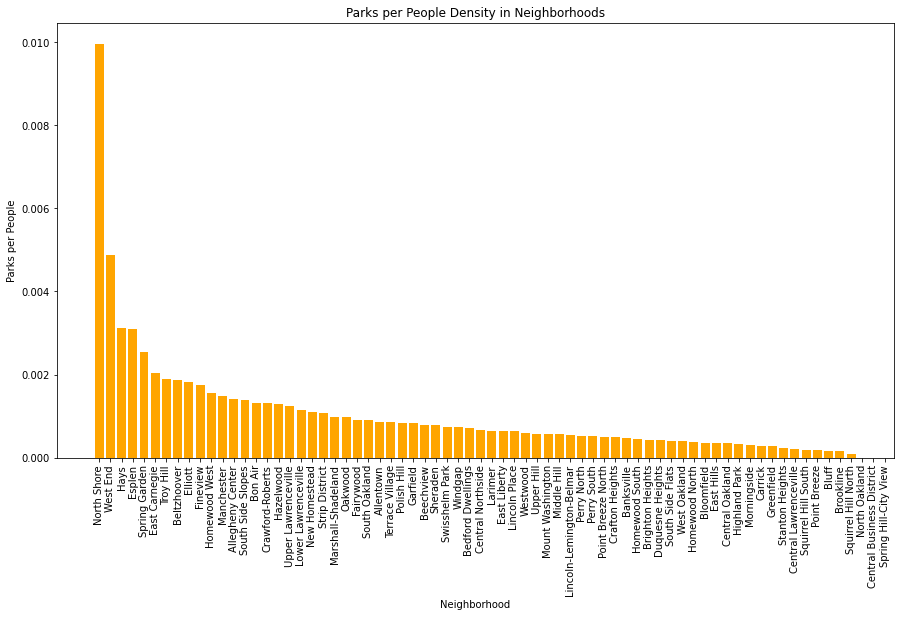

In [17]:
fig, ax = plt.subplots(figsize=(15, 8))
merged_data_sorted = merged_data.sort_values(by="parks_per_people", ascending=False)
ax.bar(merged_data_sorted["hood"], merged_data_sorted["parks_per_people"], color='orange')

# Set plot title and labels
plt.title("Parks per People Density in Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Parks per People")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()